In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [10]:
#Data generating
mean = np.array([0,0])
cov = np.array([[3,0.1],[0.1,1]])
distances1 = np.random.multivariate_normal(mean,cov, 1000) # key for this is 0
print(distances1.mean(axis=0))
print(distances1.mean())


[-0.0419696   0.03035767]
-0.005805962511651373


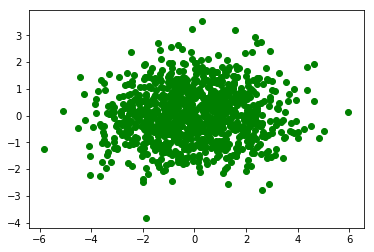

In [11]:
plt.figure()
plt.scatter(distances1[:,0],distances1[:,-1],color="green")
plt.show()

In [12]:
mean = np.array([3,4])
cov  = np.array([[2,1],[1,1]])
distances2 = np.random.multivariate_normal(mean, cov,1000) # key for this is 1

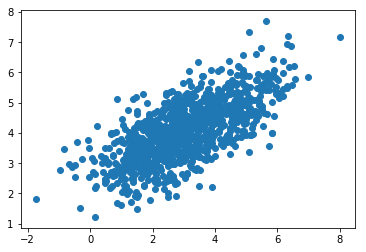

In [6]:
plt.figure()
plt.scatter(distances2[:,0],distances2[:,1])
plt.show()

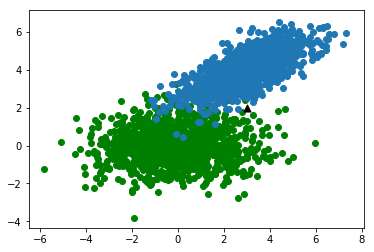

In [13]:
#Study Data
plt.figure()
plt.scatter(distances1[:,0],distances1[:,-1],color="green")
plt.scatter(distances2[:,0],distances2[:,1])
plt.scatter(3,2, marker='^', color='black', s=50) # for this point we need to find for what region it should lie in
plt.show()

In [15]:
#Generating Dataset
distances1.shape[0]
dataset = np.zeros((distances1.shape[0]+distances2.shape[0],distances1.shape[1]+1))
print(dataset[:3])
print(dataset.shape)
dataset[:distances1.shape[0] , :-1] = distances1
dataset[distances1.shape[0]: , :-1] = distances2
dataset[:distances1.shape[0],-1] = 0
dataset[distances1.shape[0]:,-1] = 1

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(2000, 3)


In [16]:
np.random.shuffle(dataset)

In [17]:
split = int(dataset.shape[0]*0.8)
X_train = dataset[:split, :-1]
Y_train = dataset[:split, -1]

X_test = dataset[split:, :-1]
Y_test = dataset[split:, -1]


In [18]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [19]:
# K-nearest neighbors
def knn(x_train , y_train , point , k=5):
    distances = []
    for i in range(x_train.shape[0]):
        x_temp = x_train[i]
        y_temp = y_train[i]
        distances.append((euclidean(point , x_temp),y_temp))

    sorted_distances = sorted(distances, key = lambda x: x[0])
    k_nearest = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest[:,1] ,return_counts=True)
    labels, counts = freq
    index = np.argmax(counts)
#     print(freq,labels , counts, sep = '\n\n')
#     print(freq)
    ans = labels[index]
    arr = np.array([[1,2],[2,3]])

 
  
    return ans

In [20]:
print("point (3,2) should lie in dataset of key", knn(X_train,Y_train,np.array([3,2])))

point (3,2) should lie in dataset of key 1.0


In [21]:
# Acc
def accuracy(X_test , Y_test ,X_train, Y_train,k=5):
    predictions = []
    for point in X_test:
        ans = knn(X_train,Y_train,point)
        predictions.append(ans)
    predictions = np.array(predictions)
    acc = (predictions == Y_test).sum() / Y_test.shape[0]
    return acc




In [22]:
# print(accuracy(X_test , Y_test ,X_train, Y_train))

print("accuracy is " ,accuracy(X_test, Y_test, X_train, Y_train))

accuracy is  0.98
